# SAP Credv2

The following subsections show a representation of the file format portions and how to generate them.

First we need to perform some setup to import the packet classes:

In [1]:
from pysap.SAPCredv2 import *
from IPython.display import display

## Credv2 without LPS

We'll read the files used in the test case suite and use them as example:

In [2]:
with open("../../tests/data/cred_v2_lps_off_3des", "rb") as fd:
    cred_v2_lps_off_3des_string = fd.read()
cred_v2_lps_off_3des = SAPCredv2(cred_v2_lps_off_3des_string)          

with open("../../tests/data/cred_v2_lps_off_aes256", "rb") as fd:
    cred_v2_lps_off_aes256_string = fd.read()
cred_v2_lps_off_aes256 = SAPCredv2(cred_v2_lps_off_aes256_string)

with open("../../tests/data/cred_v2_lps_off_dp_3des", "rb") as fd:
    cred_v2_lps_off_dp_3des_string = fd.read()
cred_v2_lps_off_dp_3des = SAPCredv2(cred_v2_lps_off_dp_3des_string)

The Cred files are comprised of the following main structures:

### Credv2 without LPS and 3DES encryption

In [3]:
cred_v2_lps_off_3des.show()

###[ SAPCredv2 ]### 
  \creds     \
   |###[ SAPCredv2Cred ]### 
   |  \cred      \
   |   |###[ SAPCredv2_Cred ]### 
   |   |  cert_name = <ASN1_IA5_STRING['CN=PSEOwner']>
   |   |  unknown1  = <ASN1_IA5_STRING['']>
   |   |  pse_path  = <ASN1_IA5_STRING['/secudir/pse-v2-noreq-DSA-1024-SHA1.pse']>
   |   |  unknown2  = <ASN1_IA5_STRING['']>
   |   |  cipher    = <ASN1_BIT_STRING[1011100011...0100100001]=�ץ�M����^4�y! (0 unused bit)>



### Credv2 without LPS and AES256 encryption

In [4]:
cred_v2_lps_off_aes256.show()

###[ SAPCredv2 ]### 
  \creds     \
   |###[ SAPCredv2Cred ]### 
   |  \cred      \
   |   |###[ SAPCredv2_Cred ]### 
   |   |  cert_name = <ASN1_IA5_STRING['CN=PSEOwner']>
   |   |  unknown1  = <ASN1_IA5_STRING['']>
   |   |  pse_path  = <ASN1_IA5_STRING['/secudir/pse-v2-noreq-DSA-1024-SHA1.pse']>
   |   |  unknown2  = <ASN1_IA5_STRING['']>
   |   |  cipher    = <ASN1_BIT_STRING[0000000100...0011010100]=  c˶8<�...@	 �s��� (0 unused bit)>



### Credv2 without LPS Cipher Header

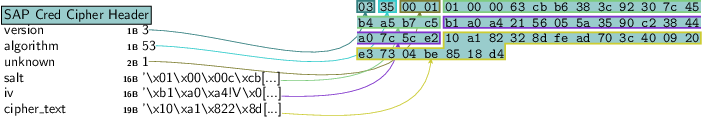

In [5]:
cipher_header = SAPCredv2_Cred_Cipher(str(cred_v2_lps_off_aes256.creds[0].cred.cipher))
cipher_header.canvas_dump()

### Credv2 Plain Credential

After decrypting the credential using the username provided, the plaintext contains the following structure:

In [6]:
cred_v2_lps_off_aes256_plain = cred_v2_lps_off_aes256.creds[0].cred.decrypt("username")
cred_v2_lps_off_aes256_plain.show()

###[ SAPCredv2_Cred_Plain ]### 
  pin       = <ASN1_IA5_STRING['1234567890']>
  option1   = None
  option2   = None
  option3   = None
###[ Raw ]### 
     load      = '\xeb<'



### Credv2 Plain Credential with DP API

When using SSO Credentials in Windows, the CommonCryptoLib encrypts the PIN using DP API.

In [7]:
cred_v2_lps_off_dp_3des_plain = cred_v2_lps_off_dp_3des.creds[0].cred.decrypt("username")
cred_v2_lps_off_dp_3des_plain.show()

###[ SAPCredv2_Cred_Plain ]### 
  pin       = <ASN1_IA5_STRING['01000000D08C9DDF0115D1118C7A00C04FC297EB010000006B3FF795A63D2D44B7604E350C2A4ED6040000002A000000430072006500640065006E007400690061006C0045006E006300720079007000740069006F006E000000106600000001000020000000BA59F09CE09554B0728C0B3137DBAA19F2DDF1891E55B8BCBC0944E25111BFF1000000000E800000000200002000000035FCC9DF90BD839D4C346B2A141380496D03CD31CBA9723A286651FAE88323EE10000000E080324A3237B73118103135CB3D305A40000000DC036DA55EDB9ED7670A602C5EDD4B8DE8CDC890D70094117DAA8EF1B3AFBA46D817044F3FDA6EF53694D6CF13CA5AB330025855AEAB657C47F6B2B8972581F2']>
  option1   = <ASN1_IA5_STRING['MSCryptProtect']>
  option2   = None
  option3   = None
###[ Raw ]### 
     load      = '\x04\x04\x04\x04'



## Credv2 with LPS

We'll read the files used in the test case suite and use them as example:

In [8]:
with open("../../tests/data/cred_v2_lps_on_dp_aes256", "rb") as fd:
    cred_v2_lps_on_dp_aes256_string = fd.read()
cred_v2_lps_on_dp_aes256 = SAPCredv2(cred_v2_lps_on_dp_aes256_string)          

with open("../../tests/data/cred_v2_lps_on_int_aes256", "rb") as fd:
    cred_v2_lps_on_int_aes256_string = fd.read()
cred_v2_lps_on_int_aes256 = SAPCredv2(cred_v2_lps_on_int_aes256_string)

The Cred files are comprised of the following main structures:

### Credv2 with LPS in DP API Mode (Windows)

In [9]:
cred_v2_lps_on_dp_aes256.show()

###[ SAPCredv2 ]### 
  \creds     \
   |###[ SAPCredv2Cred ]### 
   |  \cred      \
   |   |###[ SAPCredv2_Cred_LPS ]### 
   |   |  version   = 0x2 <ASN1_INTEGER[2]>
   |   |  oid       = <ASN1_OID['commonName']>
   |   |  value     = <ASN1_PRINTABLE_STRING['PSEOwner']>
   |   |  pse_path  = <ASN1_UTF8_STRING['C:\\secudir\\pse-v2-noreq-DSA-1024-SHA1.pse']>
   |   |  cipher    = <ASN1_BIT_STRING[0000001000...1101001111]= CredEn...�U��t�O (0 unused bit)>



### Credv2 with LPS in INT/Fallback mode (Linux without TPM)

In [10]:
cred_v2_lps_on_int_aes256.show()

###[ SAPCredv2 ]### 
  \creds     \
   |###[ SAPCredv2Cred ]### 
   |  \cred      \
   |   |###[ SAPCredv2_Cred_LPS ]### 
   |   |  version   = 0x2 <ASN1_INTEGER[2]>
   |   |  oid       = <ASN1_OID['commonName']>
   |   |  value     = <ASN1_PRINTABLE_STRING['PSEOwner']>
   |   |  pse_path  = <ASN1_UTF8_STRING['/secudir/pse-v2-noreq-DSA-1024-SHA1.pse']>
   |   |  cipher    = <ASN1_BIT_STRING[0000001000...0110100010]=  CredEn...��Z3y��9� (0 unused bit)>



In [11]:
cred_v2_lps_on_int_aes256_plain = cred_v2_lps_on_int_aes256.creds[0].cred.decrypt("username")
cred_v2_lps_on_int_aes256_plain.show()

###[ SAPCredv2_Cred_Plain ]### 
  pin       = <ASN1_IA5_STRING['1234567890']>
  option1   = None
  option2   = None
  option3   = None



### SAP LPS Cipher header

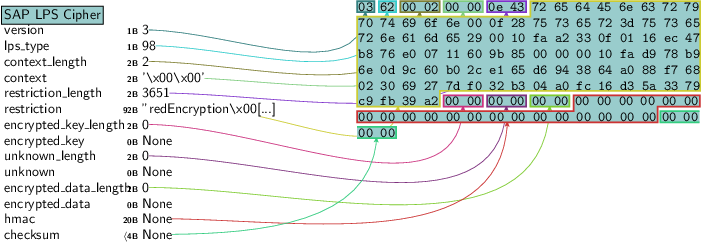

In [12]:
lps_cipher_header = SAPLPSCipher(str(cred_v2_lps_on_int_aes256.creds[0].cred.cipher))
lps_cipher_header.canvas_dump()